In [ ]:
  qimport os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pwd

/content


In [ ]:
train_path = "HealthCare Data.csv"
test_path = "Test_data.csv"

In [ ]:
import chardet 
train_file = open(train_path, 'rb')
test_file = open(test_path, 'rb')
train_encod = chardet.detect(train_file.read())
test_encod = chardet.detect(test_file.read()) 

In [ ]:
df_train = pd.read_csv(train_path, encoding=train_encod["encoding"])
df_test = pd.read_csv(test_path, encoding=test_encod["encoding"])

In [ ]:
df_train.isna().sum()

Patient_comment     0
Patient_Category    0
dtype: int64

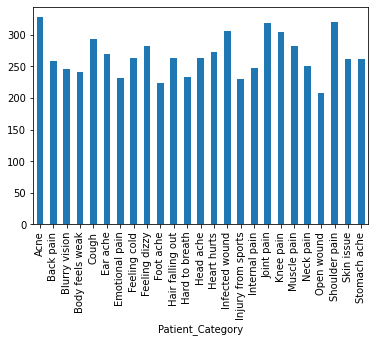

In [ ]:
df_train.groupby('Patient_Category').Patient_comment.count().plot.bar(ylim = 0)

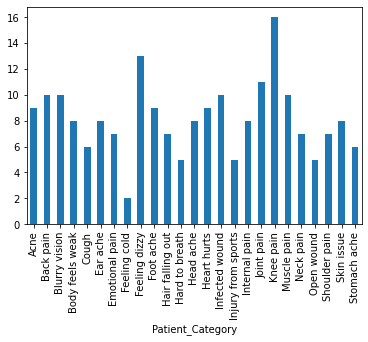

In [ ]:
df_test.groupby('Patient_Category').Patient_comment.count().plot.bar(ylim = 0)

In [ ]:
doctor_types = {
	'Emotional pain':'Psychiatrist', 
	'Hair falling out':'Dermatologist', 
	'Heart hurts':'Cardiologist',
    'Infected wound':'Surgeon', 
    'Foot ache':'Rheumatologist', 
    'Shoulder pain':'Rheumatologist/Gastro-enterologist',
    'Injury from sports':'Rheumatologist', 
    'Skin issue':'Dermatologist',
    'Stomach ache':'Gastro-enterologist', 
    'Knee pain':'Orthopedist',
    'Joint pain':'Orthopedist', 
    'Hard to breath':'Respirologist', 
    'Head ache':'Neurologist/Gastro-enterologist', 
    'Body feels weak':'General-Physicians',
    'Feeling dizzy':'General-Physicians', 
    'Back pain':'Orthopedist', 
    'Open wound':'Surgeon', 
    'Internal pain':'Gastro-enterologist',
	'Blurry vision':'Ophthalmologist',
    'Acne':'Dermatologist', 
    'Muscle pain':'Rheumatologist' ,
    'Neck pain':'Rheumatologist/Orthopedist',
    'Cough':'ENT Specialist',
    'Ear ache':'ENT Specialist', 
    'Feeling cold':'ENT Specialist'
}

In [ ]:
df_train['specialist_type'] = df_train['Patient_Category'].replace(doctor_types, inplace=False)
df_test['specialist_type'] = df_test['Patient_Category'].replace(doctor_types, inplace=False)

In [ ]:
df_train.head(2)


,Patient_comment,Patient_Category,specialist_type
0,When I remember her I feel down,Emotional pain,Psychiatrist
1,When I carry heavy things I feel like breaking...,Hair falling out,Dermatologist


In [ ]:
df_test.head(2)

,Patient_comment,Patient_Category,specialist_type
0,I have muscle pain in my left leg,Shoulder pain,Rheumatologist/Gastro-enterologist
1,I have cut my finger because of playing footba...,Injury from sports,Rheumatologist


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_X = df_train['Patient_comment']
train_y = df_train['specialist_type'].to_numpy()

test_X = df_test['Patient_comment']
test_y = df_test['specialist_type'].to_numpy()

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_train_y = to_categorical(encoder.transform(train_y))
encoded_test_y = to_categorical(encoder.transform(test_y))

In [ ]:
vocab_size = 100000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_X)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_X)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_X)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax'),

])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           1600000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 56)                952       
_________________________________________________________________
dense_4 (Dense)              (None, 28)                1596      
_________________________________________________________________
dense_5 (Dense)              (None, 14)                406       
Total params: 1,602,954
Trainable params: 1,602,954
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 60
history = model.fit(training_padded, encoded_train_y, epochs=num_epochs, validation_data=(testing_padded, encoded_test_y), verbose=2)

Epoch 1/60
209/209 - 4s - loss: 0.0233 - accuracy: 0.9985 - val_loss: 0.2881 - val_accuracy: 0.9706
Epoch 2/60
209/209 - 4s - loss: 0.0238 - accuracy: 0.9982 - val_loss: 0.2954 - val_accuracy: 0.9706
Epoch 3/60
209/209 - 4s - loss: 0.0228 - accuracy: 0.9983 - val_loss: 0.2457 - val_accuracy: 0.9706
Epoch 4/60
209/209 - 4s - loss: 0.0223 - accuracy: 0.9983 - val_loss: 0.2594 - val_accuracy: 0.9706
Epoch 5/60
209/209 - 4s - loss: 0.0196 - accuracy: 0.9982 - val_loss: 0.2406 - val_accuracy: 0.9706
Epoch 6/60
209/209 - 4s - loss: 0.0201 - accuracy: 0.9979 - val_loss: 0.2293 - val_accuracy: 0.9706
Epoch 7/60
209/209 - 4s - loss: 0.0194 - accuracy: 0.9979 - val_loss: 0.2605 - val_accuracy: 0.9706
Epoch 8/60
209/209 - 4s - loss: 0.0182 - accuracy: 0.9982 - val_loss: 0.1978 - val_accuracy: 0.9706
Epoch 9/60
209/209 - 4s - loss: 0.0182 - accuracy: 0.9982 - val_loss: 0.1948 - val_accuracy: 0.9755
Epoch 10/60
209/209 - 4s - loss: 0.0158 - accuracy: 0.9985 - val_loss: 0.2037 - val_accuracy: 0.9755

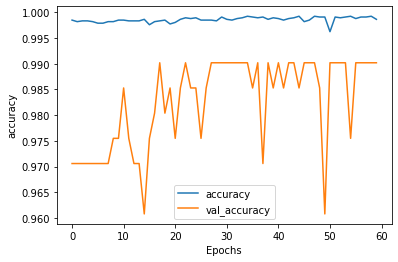

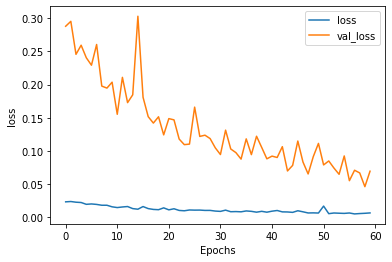

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")